In [0]:
pip install kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d zalando-research/fashionmnist

In [0]:
from zipfile import ZipFile
with ZipFile("fashionmnist.zip",'r') as zip:
  x=zip.extractall()

In [0]:
import numpy as np
import pandas as pd
train=np.loadtxt('fashion-mnist_train.csv',delimiter=',',skiprows=1)[:,1:]

In [0]:
train.shape

(60000, 784)

In [0]:
test=np.loadtxt('fashion-mnist_test.csv',delimiter=',',skiprows=1)[:,1:]

In [0]:
test.shape

(10000, 784)

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

TensorFlow 1.x selected.


In [0]:
n_input=784
n_hidden1=256
n_hidden2=32
n_hidden3=32
n_hidden4=256
n_output=784


In [0]:
learning_rate=0.1
epochs=100
batch_size=100

In [0]:
X=tf.placeholder(tf.float32,shape=(None,n_input))
y=tf.placeholder(tf.float32,shape=(None,n_output))

In [0]:
with tf.name_scope('layer'):
  hidden1=tf.layers.dense(X,n_hidden1,name="hidden1",activation=tf.nn.relu)
  hidden2=tf.layers.dense(hidden1,n_hidden2,name="hidden2",activation=tf.nn.relu)
  hidden3=tf.layers.dense(hidden2,n_hidden3,name="hidden3",activation=tf.nn.relu)
  hidden4=tf.layers.dense(hidden3,n_hidden4,name="hidden4",activation=tf.nn.relu)
  logits=tf.layers.dense(hidden4,n_output,name="outputs")

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
'''
nn_weight={'W1':tf.Variable(tf.truncated_normal([n_input,n_hidden1],stddev=0.1),tf.float32),
          'W2':tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2],stddev=0.1)),
          'W3':tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3],stddev=0.1)),
          'W4':tf.Variable(tf.truncated_normal([n_hidden3,n_hidden4],stddev=0.1)),
          'Wout':tf.Variable(tf.truncated_normal([n_hidden4,n_output],stddev=0.1))
}

nn_bias={'B1':tf.Variable(tf.truncated_normal([n_hidden1]),tf.float32),
          'B2':tf.Variable(tf.truncated_normal([n_hidden2])),
          'B3':tf.Variable(tf.truncated_normal([n_hidden3])),
          'B4':tf.Variable(tf.truncated_normal([n_hidden4])),
          'B5':tf.Variable(tf.truncated_normal([n_output]))
}'''

"\nnn_weight={'W1':tf.Variable(tf.truncated_normal([n_input,n_hidden1],stddev=0.1),tf.float32),\n          'W2':tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2],stddev=0.1)),\n          'W3':tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3],stddev=0.1)),\n          'W4':tf.Variable(tf.truncated_normal([n_hidden3,n_hidden4],stddev=0.1)),\n          'Wout':tf.Variable(tf.truncated_normal([n_hidden4,n_output],stddev=0.1))\n}\n\nnn_bias={'B1':tf.Variable(tf.truncated_normal([n_hidden1]),tf.float32),\n          'B2':tf.Variable(tf.truncated_normal([n_hidden2])),\n          'B3':tf.Variable(tf.truncated_normal([n_hidden3])),\n          'B4':tf.Variable(tf.truncated_normal([n_hidden4])),\n          'B5':tf.Variable(tf.truncated_normal([n_output]))\n}"

In [0]:
with tf.name_scope("loss"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
training_op=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
optimizer=training_op.minimize(loss)

In [0]:
np.random.shuffle(train)
X_train=train
X_train_noisy=X_train+(10*np.random.normal(0,1,size=X_train.shape))

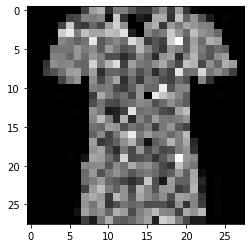

In [0]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')

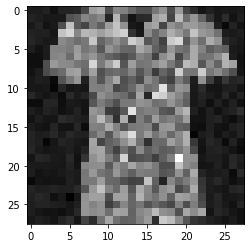

In [0]:
plt.imshow(X_train_noisy[0].reshape(28,28),cmap='gray')

In [0]:
total_num_images=(train.shape[0])
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)




In [0]:
for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch=X_train[i*batch_size:(i+1)*batch_size]
    X_noise_epoch=X_train_noisy[i*batch_size:(i+1)*batch_size]
    _,loss=sess.run([optimizer,loss],feed_dict={X:X_noise_epoch,y:X_epoch})
  print('EPOCH',epoch,'/',epochs,'loss:',loss)






In [0]:
X_actual=X_train[10]
noisy_image=X_train_noisy[10]

denoised_image=sess.run(logits,feed_dict={X:noise_image})

In [0]:
fig,axes=plt.subplots(nrows=3,n_cols=1,sharex=True,sharey=True,figsize=(20,4))
for images,row in zip([X_actual,noisy_image,denoised_image],axes):
  for img,ax in zip(images,row):
    ax.imshow(img.reshape(28,28),cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  fig.tight_layout(pad=0.1)